In [1]:
from influxdb import InfluxDBClient
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.

In [2]:
client = InfluxDBClient(host="10.9.141.15",database="ems_collector")

In [3]:
client.get_list_database()

[{'name': '_internal'}, {'name': 'ems_collector'}]

In [4]:
client.get_list_measurements()

[{'name': 'ems_collector_fac_plc_energy'},
 {'name': 'ems_collector_machine_pac_energy'},
 {'name': 'ems_collector_machine_plc_energy'}]

In [5]:
query = "select * from ems_collector_machine_plc_energy where mdmname= 'JQPTENG2CSS1CB_0040AA0CNCGROB' limit 51840"

In [6]:
result = client.query(query)

In [7]:
type(result)

influxdb.resultset.ResultSet

In [8]:
for i in result:
    dic = {}
    for a,x in enumerate(i):
        dic[a] = x
df = pd.DataFrame(dic).T

In [9]:
df.columns

Index(['PowerfactorA', 'PowerfactorB', 'PowerfactorC', 'TotalPowerFactor',
       'UnbalanceCurrent', 'UnbalanceVoltage', 'a_current', 'ab_voltage',
       'activeEnergy', 'apparentEnergy', 'b_current', 'bc_voltage',
       'c_current', 'ca_voltage', 'ip', 'machinestatus1', 'machinestatus10',
       'machinestatus11', 'machinestatus12', 'machinestatus13',
       'machinestatus14', 'machinestatus15', 'machinestatus16',
       'machinestatus2', 'machinestatus3', 'machinestatus4', 'machinestatus5',
       'machinestatus6', 'machinestatus7', 'machinestatus8', 'machinestatus9',
       'mdmname', 'production', 'time', 'totalActivePower',
       'totalApparentPower', 'totalReactivePower', 'userstatus1',
       'userstatus2', 'userstatus3', 'userstatus4', 'userstatus5',
       'userstatus6', 'userstatus7', 'userstatus8'],
      dtype='object')

In [10]:

df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].apply(lambda x:x.date())

In [11]:
labels = ['machinestatus1','machinestatus2', 'machinestatus3', 'machinestatus4', 'machinestatus5',
          'machinestatus6', 'machinestatus7', 'machinestatus8', 'machinestatus9','machinestatus10',
          'machinestatus11', 'machinestatus12', 'machinestatus13','machinestatus14', 'machinestatus15',
          'machinestatus16','userstatus1', 'userstatus2', 'userstatus3', 'userstatus4', 'userstatus5',
          'userstatus6', 'userstatus7', 'userstatus8']


In [12]:
feature = ['PowerfactorA', 'PowerfactorB', 'PowerfactorC', 'TotalPowerFactor',
           'UnbalanceCurrent', 'UnbalanceVoltage', 'a_current', 'ab_voltage',
           'activeEnergy', 'apparentEnergy', 'b_current', 'bc_voltage',
           'c_current', 'ca_voltage', 'ip', 
           'mdmname', 'production', 'time', 'totalActivePower',
           'totalApparentPower', 'totalReactivePower']

In [13]:
features = {}
for label in labels:
    features[label]=df[df[label] == 1][feature]
    print(label,len(features[label]))

machinestatus1 0
machinestatus2 0
machinestatus3 0
machinestatus4 964
machinestatus5 14544
machinestatus6 0
machinestatus7 0
machinestatus8 46845
machinestatus9 702
machinestatus10 123
machinestatus11 51713
machinestatus12 51429
machinestatus13 49072
machinestatus14 0
machinestatus15 0
machinestatus16 0
userstatus1 0
userstatus2 0
userstatus3 0
userstatus4 0
userstatus5 0
userstatus6 0
userstatus7 0
userstatus8 0


In [14]:
zero_labels = ['machinestatus1','machinestatus2', 'machinestatus3', 'machinestatus6', 'machinestatus7',
               'machinestatus14','machinestatus15', 'machinestatus16','userstatus1', 'userstatus2', 'userstatus3', 
               'userstatus4', 'userstatus5', 'userstatus6', 'userstatus7', 'userstatus8']
for label in zero_labels:
    del features[label]

In [15]:
sete = "(%s == 0)"
query = ""
for t in features.keys():
    condi = sete % t
    query = query + condi + ' and '
query = query[:-4]

In [16]:
df.query(query)

,PowerfactorA,PowerfactorB,PowerfactorC,TotalPowerFactor,UnbalanceCurrent,UnbalanceVoltage,a_current,ab_voltage,activeEnergy,apparentEnergy,...,totalReactivePower,userstatus1,userstatus2,userstatus3,userstatus4,userstatus5,userstatus6,userstatus7,userstatus8,date


In [17]:
describe={}
for t in features.keys():
    describe[t] = {}
    for f in feature:
        if f in ['time','ip','mdmname','activeEnergy','apparentEnergy']:
            continue
        m = features[t][f].mean()
        describe[t][f]=m

In [18]:
df_describe = pd.DataFrame(describe)

In [19]:
df_describe

,machinestatus4,machinestatus5,machinestatus8,machinestatus9,machinestatus10,machinestatus11,machinestatus12,machinestatus13
PowerfactorA,0.770858,0.766852,0.781104,0.766134,0.788528,0.777115,0.778072,0.781939
PowerfactorB,0.683094,0.678707,0.706154,0.676461,0.711600,0.706945,0.707121,0.706810
PowerfactorC,0.631992,0.626329,0.662818,0.622328,0.635196,0.663352,0.663418,0.662280
TotalPowerFactor,0.696307,0.691609,0.717651,0.689368,0.713400,0.716755,0.717156,0.717986
UnbalanceCurrent,10.287632,10.417550,9.424293,10.636363,11.583618,9.342481,9.353638,9.525623
UnbalanceVoltage,0.162052,0.159102,0.163239,0.162712,0.162132,0.161266,0.161320,0.162904
a_current,15.334126,15.230610,18.765778,15.014143,12.160107,17.565574,17.684688,18.469059
ab_voltage,393.463887,393.846603,393.457229,394.744106,390.142954,393.503559,393.492629,393.434324
b_current,17.237654,17.149198,20.595190,16.935729,13.944442,19.300031,19.432969,20.298150
bc_voltage,392.589976,392.982002,392.572432,393.856999,389.330497,392.635975,392.623957,392.552414


PowerfactorA


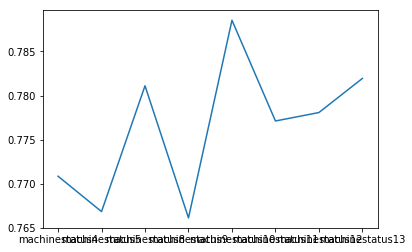

PowerfactorB


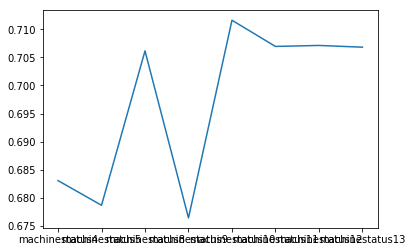

PowerfactorC


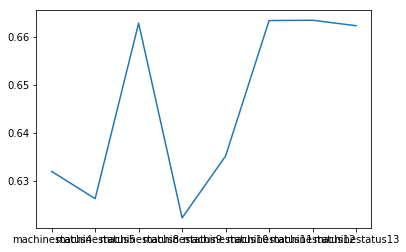

TotalPowerFactor


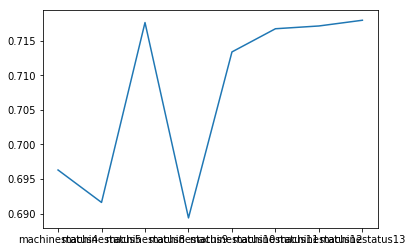

UnbalanceCurrent


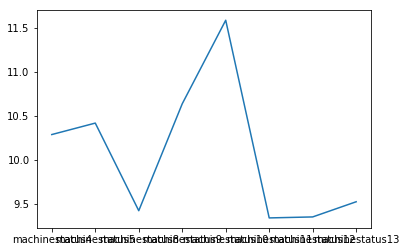

UnbalanceVoltage


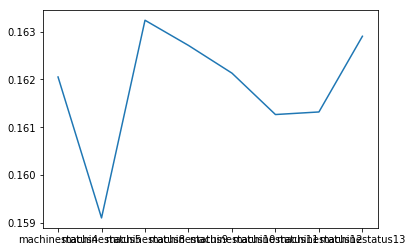

a_current


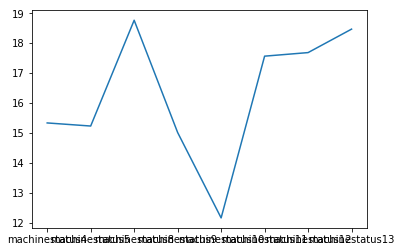

ab_voltage


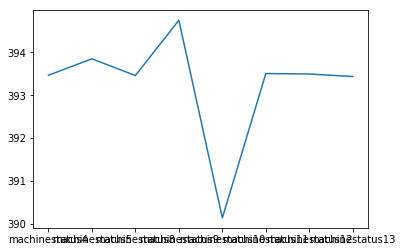

b_current


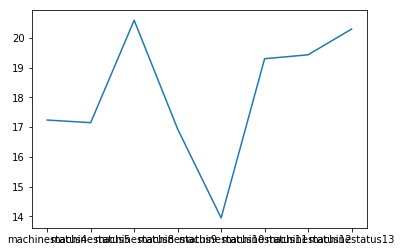

bc_voltage


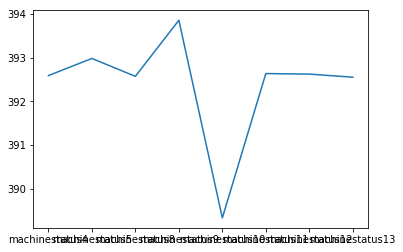

c_current


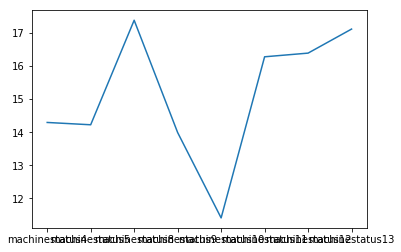

ca_voltage


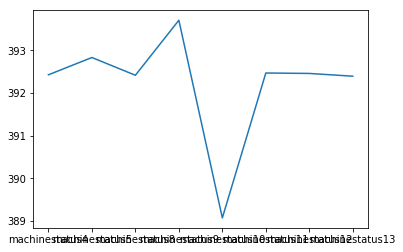

production


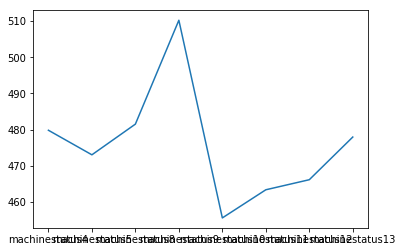

totalActivePower


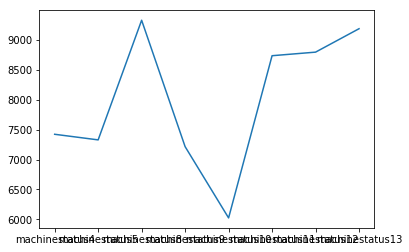

totalApparentPower


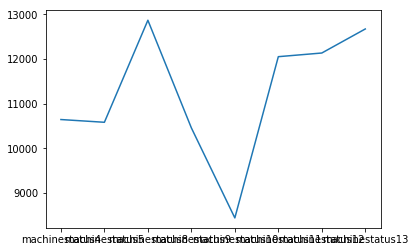

totalReactivePower


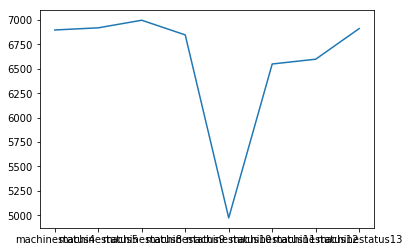

In [36]:
for r in df_describe.index:
    print(r)
    plt.plot(df_describe.columns,df_describe.loc[r])
    plt.show()

In [20]:
df_train = df[['PowerfactorA', 'PowerfactorB', 'PowerfactorC', 'TotalPowerFactor',
              'UnbalanceCurrent', 'UnbalanceVoltage', 'a_current','b_current','c_current'
              ]]

In [ ]:
plt.subplot(3,1,1)
plt.plot(df['time'],df['PowerfactorB'])
plt.subplot(3,1,2)
plt.plot(df['time'],df['b_current'])
plt.subplot(3,1,3)
plt.plot(df['time'],df['c_current'])
plt.show()

In [ ]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df['time'].iloc[:],df['totalActivePower'].iloc[:])
ax2.plot(df['time'].iloc[:],df['a_current'].iloc[:])
ax2.plot(df['time'].iloc[:],df['b_current'].iloc[:])
ax2.plot(df['time'].iloc[:],df['c_current'].iloc[:])
plt.show()

In [ ]:
plt.plot(df['time'],df['ab_voltage'])
plt.plot(df['time'],df['bc_voltage'])
plt.plot(df['time'],df['ca_voltage'])
plt.show()

In [21]:
cluster = KMeans(n_clusters=4)

In [22]:
k = cluster.fit_predict(df_train)

In [23]:
df_train['cluster'] = k
df['cluster'] = k

C:\Users\ssaeiv\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


machinestatus4


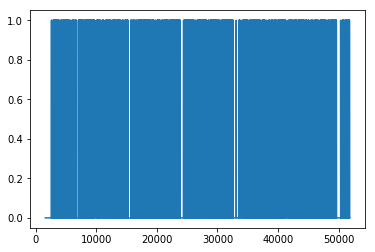

machinestatus5


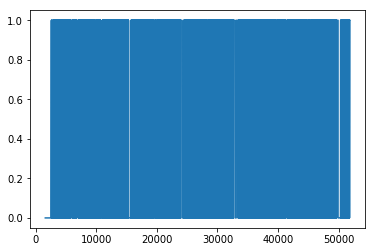

machinestatus8


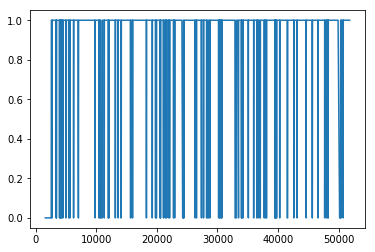

machinestatus9


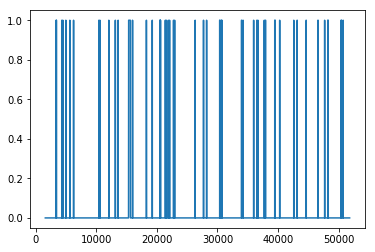

machinestatus10


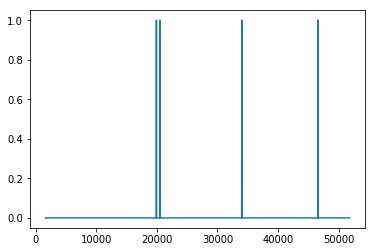

machinestatus11


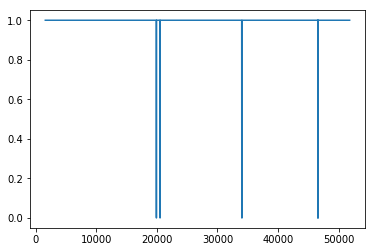

machinestatus12


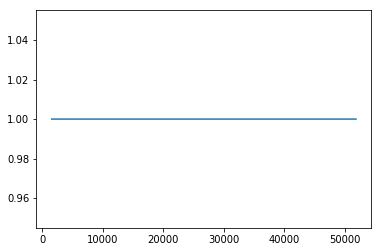

machinestatus13


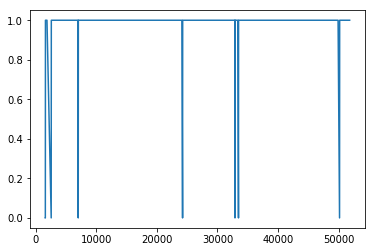

In [45]:
for f in features.keys():
    print(f)
    plt.plot(df[df['cluster'] == 1][f])
    plt.show()

In [25]:
d = df_train.groupby(by='cluster')

PowerfactorA


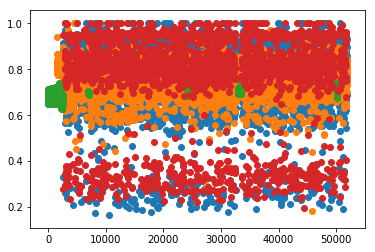

PowerfactorB


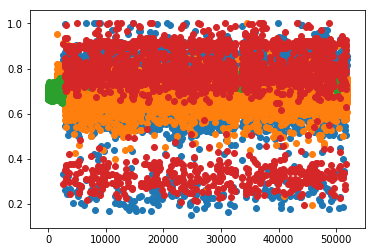

PowerfactorC


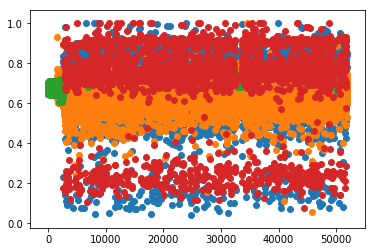

TotalPowerFactor


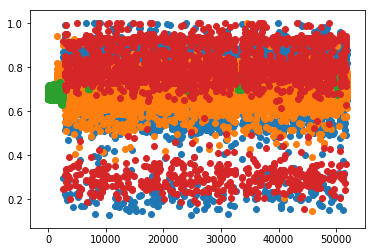

UnbalanceCurrent


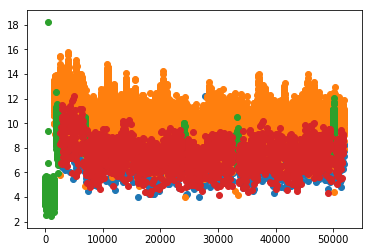

UnbalanceVoltage


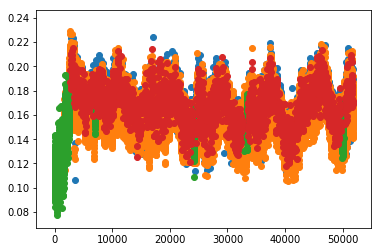

a_current


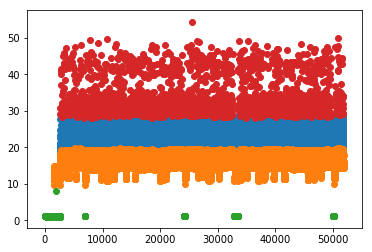

b_current


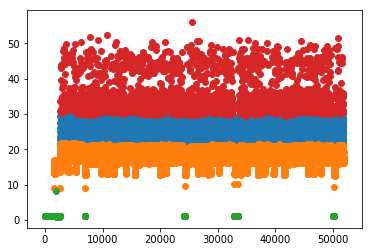

c_current


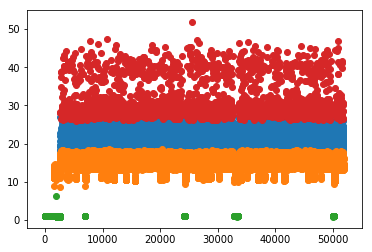

cluster


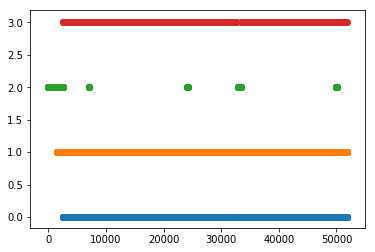

In [26]:
for f in df_train.columns:
    print(f)
    for i in range(4):
        plt.scatter(d.get_group(i).index,d.get_group(i)[f])
    plt.show()

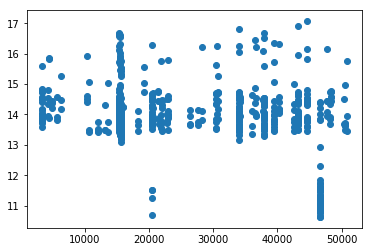

In [59]:
plt.scatter(df[df['machinestatus9']==1].index,df[df['machinestatus9']==1]['c_current'])

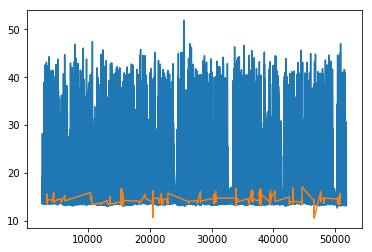

In [47]:
plt.plot(df[df['machinestatus8']==1].index,df[df['machinestatus8']==1]['c_current'])
plt.plot(df[df['machinestatus9']==1].index,df[df['machinestatus9']==1]['c_current'])

In [52]:
thinghd = df['machinestatus4']+df['machinestatus5']
plt.plot(thinghd)

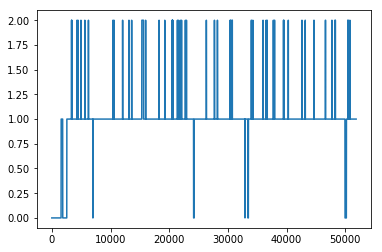

In [56]:
thinghd = df['machinestatus9']+df['machinestatus13']
plt.plot(thinghd)

In [ ]:
plt.scatter(x=x,y=y,c=c)

In [ ]:
x=[]
y=[]
c=[0,1,2,3]
for i in c:
    x.append(df['totalActivePower'][df['cluster'] == i].mean())
    y.append(df['a_current'][df['cluster'] == i].mean())

In [ ]:
plt.subplot(2,1,1)
plt.plot(df['time'],df['totalActivePower'])
plt.subplot(2,1,2)
plt.plot(df['time'],df['totalApparentPower'])


In [ ]:
for i in c:
    print(len(df[df['cluster'] == i]['totalActivePower']))

In [ ]:
plt.plot(df['time'],df['totalActivePower']/df['totalApparentPower'])